Unit 6 | Assignment - What's the Weather Like?
Background
Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..."

But, if pressed, how would you prove it?

Equator
WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

1. Temperature (F) vs. Latitude
2. Humidity (%) vs. Latitude
3. Cloudiness (%) vs. Latitude
4. Wind Speed (mph) vs. Latitude


Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.
As final considerations:

You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.
Hints and Considerations
You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the geographic coordinate system.

Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

Though we've never worked with the citipy Python library, push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [41]:
import requests
import json
import citipy
import random
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from citipy import citipy
from localenv import api_key

%matplotlib inline

# api.openweathermap.org/data/2.5/find?q=London

In [42]:
#function to get the list of cities that will be used to extract weather data
def generate_city_list(number_of_cities):
    cities = []
    lat = 0
    long = 0

    for i in range(number_of_cities):
        lat = round(random.uniform(-90, 90),2)
        long = round(random.uniform(-180, 180),2)
        city = citipy.nearest_city(lat, long)
        if city is not None and city not in cities:
            cities.append(city)
            
    return cities

In [43]:
#function to get the weather data from the list of cities
def get_weather_data(cities, weather_data, sample_size, counter):
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    params = {"appid": api_key,
          "q": "",
          "units":"imperial"}
    
    for city in cities:
        counter += 1
        params["q"] = city.city_name
        target_url= f"{base_url}appid={api_key}&units=imperial&q={city.city_name}"
        print(f"Processing Record {counter} of {sample_size} | {city.city_name}")
        print(target_url)
        response = requests.get(target_url).json()
        #response = requests.get(base_url,params=params).json()
        try:
            if (response is not None and response['cod'] == 200):
                weather_data.append(response)
        except Exception as e:
            print(e)
            pass
        
        if(counter % 10 == 0):
            time.sleep(6)
    
    return weather_data

In [44]:
#get the weather data
sample_size = 500
city_list = []
weather_json_l = []

while (len(weather_json_l) < sample_size):
    city_list = generate_city_list(sample_size-len(weather_json_l))  # get the city list
    weather_json_l = get_weather_data(city_list, weather_json_l, sample_size, len(weather_json_l))
    print(f"{len(weather_json_l)}  , {sample_size}")
    
print(len(weather_json_l))
#weather_json_l[0]

Processing Record 1 of 500 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=carnarvon
Processing Record 2 of 500 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=port alfred
Processing Record 3 of 500 | albany
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=albany
Processing Record 4 of 500 | chkalovskoye
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=chkalovskoye
Processing Record 5 of 500 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=inhambane
Processing Record 6 of 500 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=severo-kurilsk
Processing Record 7 of 500 | avarua
http://api.openweathermap.org/data/2.5

Processing Record 55 of 500 | carauari
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=carauari
Processing Record 56 of 500 | straumen
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=straumen
Processing Record 57 of 500 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=mataura
Processing Record 58 of 500 | benghazi
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=benghazi
Processing Record 59 of 500 | phan thiet
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=phan thiet
Processing Record 60 of 500 | castro
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=castro
Processing Record 61 of 500 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=e23b

Processing Record 109 of 500 | muros
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=muros
Processing Record 110 of 500 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=salalah
Processing Record 111 of 500 | gangotri
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=gangotri
Processing Record 112 of 500 | mpongwe
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=mpongwe
Processing Record 113 of 500 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=hobart
Processing Record 114 of 500 | touros
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=touros
Processing Record 115 of 500 | bandar-e lengeh
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b

Processing Record 163 of 500 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=illoqqortoormiut
Processing Record 164 of 500 | asau
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=asau
Processing Record 165 of 500 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=kaeo
Processing Record 166 of 500 | karauzyak
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=karauzyak
Processing Record 167 of 500 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=belushya guba
Processing Record 168 of 500 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=saint george
Processing Record 169 of 500 | komsomolskiy
http://api.openweatherma

Processing Record 217 of 500 | la rochelle
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=la rochelle
Processing Record 218 of 500 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=tilichiki
Processing Record 219 of 500 | tucumcari
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=tucumcari
Processing Record 220 of 500 | mercedes
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=mercedes
Processing Record 221 of 500 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=progreso
Processing Record 222 of 500 | lamu
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=lamu
Processing Record 223 of 500 | lagoa
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 271 of 500 | tapaua
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=tapaua
Processing Record 272 of 500 | missoula
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=missoula
Processing Record 273 of 500 | orlik
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=orlik
239  , 500
Processing Record 240 of 500 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=hithadhoo
Processing Record 241 of 500 | dandong
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=dandong
Processing Record 242 of 500 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=katsuura
Processing Record 243 of 500 | tumannyy
http://api.openweathermap.org/data/2.5/weather?

Processing Record 291 of 500 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=barrow
Processing Record 292 of 500 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=arraial do cabo
Processing Record 293 of 500 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=aksu
Processing Record 294 of 500 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=tiksi
Processing Record 295 of 500 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=hermanus
Processing Record 296 of 500 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=thompson
Processing Record 297 of 500 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 346 of 500 | srandakan
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=srandakan
Processing Record 347 of 500 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=port elizabeth
Processing Record 348 of 500 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=kavaratti
Processing Record 349 of 500 | thenzawl
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=thenzawl
Processing Record 350 of 500 | igurubi
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=igurubi
Processing Record 351 of 500 | volkermarkt
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=volkermarkt
Processing Record 352 of 500 | bredasdorp
http://api.openweathermap.

Processing Record 400 of 500 | teguldet
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=teguldet
Processing Record 401 of 500 | barcelona
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=barcelona
Processing Record 402 of 500 | altamont
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=altamont
Processing Record 403 of 500 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=praia da vitoria
Processing Record 404 of 500 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=srednekolymsk
Processing Record 405 of 500 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=kodiak
Processing Record 406 of 500 | tambacounda
http://api.openweathe

Processing Record 435 of 500 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=vaini
Processing Record 436 of 500 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=saskylakh
Processing Record 437 of 500 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=maniitsoq
Processing Record 438 of 500 | guiratinga
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=guiratinga
Processing Record 439 of 500 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=beringovskiy
Processing Record 440 of 500 | touros
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=touros
Processing Record 441 of 500 | nizhneyansk
http://api.openweathermap.org/data/2.5/

Processing Record 478 of 500 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=hermanus
Processing Record 479 of 500 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=avarua
Processing Record 480 of 500 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=dikson
Processing Record 481 of 500 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=upernavik
Processing Record 482 of 500 | airai
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=airai
Processing Record 483 of 500 | castro
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428efa9ed43081cb6f04a77&units=imperial&q=castro
Processing Record 484 of 500 | avera
http://api.openweathermap.org/data/2.5/weather?appid=e23b8b0de428ef

In [45]:
print(weather_json_l[15])

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1014, 'humidity': 83, 'temp_min': 69.8, 'temp_max': 69.8}, 'wind': {'speed': 4.7, 'deg': 170}, 'clouds': {'all': 64}, 'dt': 1520377200, 'sys': {'type': 1, 'id': 6591, 'message': 0.0042, 'country': 'ZA', 'sunrise': 1520397131, 'sunset': 1520442537}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}


In [46]:
# Extract interesting data from responses
city_names = [data.get("name") for data in weather_json_l]
country_data = [data.get("sys").get("country") for data in weather_json_l]
date_data = [data.get("dt") for data in weather_json_l]
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp_max") for data in weather_json_l]
humidity_data =[data.get("main").get("humidity") for data in weather_json_l]
cloudiness_data = [data.get("clouds").get("all") for data in weather_json_l]
wind_speed_data = [data.get("wind").get("speed") for data in weather_json_l]

weather_dict = {"City":city_names, "Country" : country_data,
                "Date" : date_data, "Latitude": lat_data, 
                "Max Temp": temp_data, "Humidity" : humidity_data,
                "Cloudiness": cloudiness_data, "Wind Speed" : wind_speed_data}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()




,City,Cloudiness,Country,Date,Humidity,Latitude,Max Temp,Wind Speed
0,Carnarvon,24,ZA,1520381025,33,-30.97,63.99,2.86
1,Port Alfred,92,ZA,1520381026,94,-33.59,71.73,8.86
2,Albany,40,US,1520380260,51,42.65,39.20,5.28
3,Inhambane,92,MZ,1520381027,92,-23.87,78.61,7.29
4,Severo-Kurilsk,64,RU,1520381027,100,50.68,21.55,18.30


In [47]:
#Saving to CSV
weather_df.to_csv("WeatherPyData.csv",index=False)


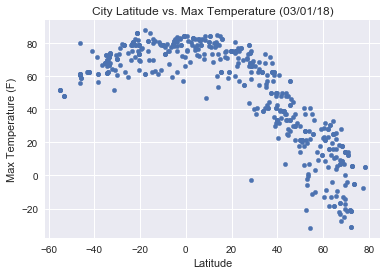

In [48]:
#Plotting  Temperature vs Latitude
ax1 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Max Temp",
                marker="o",
                title="City Latitude vs. Max Temperature (03/01/18)",
                grid=True
               )

ax1.set_ylabel("Max Temperature (F)")
fig = ax1.get_figure()

fig.savefig("TemperaturevsLatitude.png");

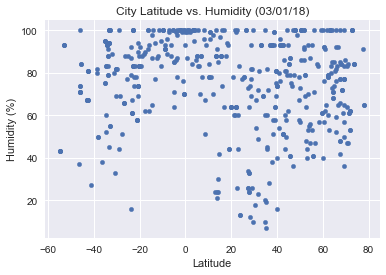

In [49]:
#Plotting % Humidity vs Latitude
ax2 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Humidity",
                marker="o",
                title="City Latitude vs. Humidity (03/01/18)",
                grid=True
               )

ax2.set_ylabel("Humidity (%)")
fig = ax2.get_figure()
fig.savefig("HumidityvsLatitude.png");

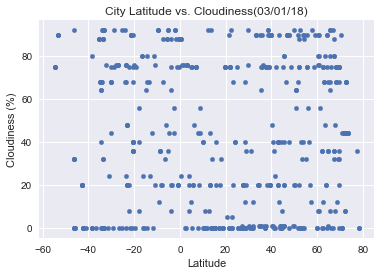

In [50]:
#Plotting % Cloudiness vs Latitude
ax3 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Cloudiness",
                marker="o",
                title="City Latitude vs. Cloudiness(03/01/18)",
                grid=True
               )

ax3.set_ylabel("Cloudiness (%)")
fig = ax3.get_figure()
fig.savefig("CloudinessvsLatitude.png");

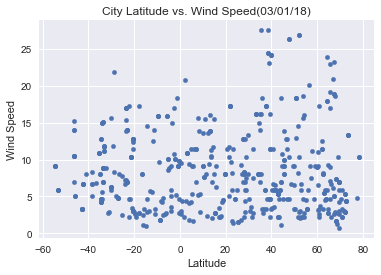

In [51]:
#Plotting % Humidity vs Latitude
ax4 = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Wind Speed",
                marker="o",
                title="City Latitude vs. Wind Speed(03/01/18)",
                grid=True
               );

fig = ax4.get_figure()
fig.savefig("WindSpeedvsLatitude.png");

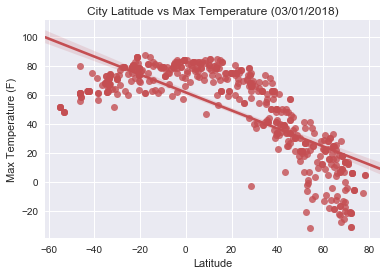

In [52]:
# Plotting with seaborn
sns.set(color_codes=True)
ax5 = sns.regplot(x="Latitude", y="Max Temp", data=weather_df, color="r", scatter='true')
ax5.set_title("City Latitude vs Max Temperature (03/01/2018)")
ax5.set_ylabel("Max Temperature (F)")
fig = ax5.get_figure()
fig.savefig("MaxvsLatitudeSeaborn.png")

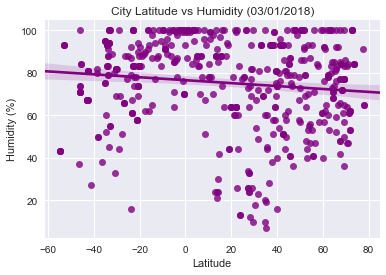

In [53]:
# Plotting with seaborn

ax6 = sns.regplot(x="Latitude", y="Humidity", data=weather_df, color="purple", scatter='true')
ax6.set_title("City Latitude vs Humidity (03/01/2018)")
ax6.set_ylabel("Humidity (%)")
fig = ax6.get_figure()
fig.savefig("HumidityvsLatitudeSeaborn.png");

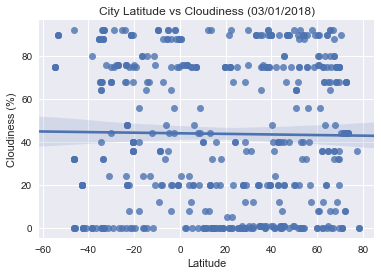

In [54]:
# Plotting with seaborn

ax7 = sns.regplot(x="Latitude", y="Cloudiness", data=weather_df, color="b", scatter='true')
ax7.set_title("City Latitude vs Cloudiness (03/01/2018)")
ax7.set_ylabel("Cloudiness (%)")
fig = ax7.get_figure()
fig.savefig("CloudinessVsLatitudeSeaborn.png");

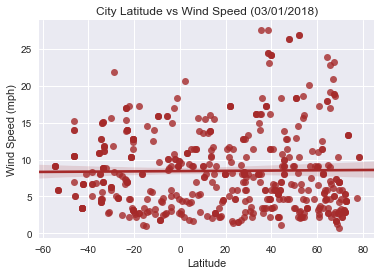

In [55]:
# Plotting with seaborn
ax8 = sns.regplot(x="Latitude", y="Wind Speed", data=weather_df, color="brown", scatter='true')
ax8.set_title("City Latitude vs Wind Speed (03/01/2018)")
ax8.set_ylabel("Wind Speed (mph)")
fig = ax8.get_figure()
fig.savefig("WindSpeedVsLatitudeSeaborn.png");